In [1]:
from lxml import etree
import json
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline  
import seaborn as sns


# Parsing 

In [2]:
def parse(file_path): 
    i = 0 
    tmp = ''
    key = ''
    xml2 = etree.iterparse(file_path, recover=True)
    data = []
    for action, elem in xml2:
        data.append((elem.attrib, elem.tag, elem.text))
    data_dict = {}
    
    for attrib, tag, text in data: 
        try : 
            tmp = key
            
            key = attrib.get('qualifier')
            element = attrib.get('element')
            
            #way to distinguish eliminate some nan!
            if key == 'none':
                key = element
            
            if key in data_dict.keys() : 
                i = i + 1 
                data_dict[key + str(i)] = text
            else : 
                i = 0 
                data_dict[key] = text
                
        except TypeError: 
            if 'subject' in tag:
                if 'subject' in data_dict.keys():
                    data_dict['subject'].append(text)
                else:
                    data_dict['subject'] = [text]

    return data_dict


### Get all data 

In [3]:
import os
rootdir = '/Users/lguillain/Documents/EPFL2018/Semester-Project/papers-import/'
nchouf = os.walk(rootdir)

In [4]:
all_data = {}
i= 0
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        path = os.path.join(subdir, file)
        if 'dublin_core' in (path) : 
            i += 1
            num_doc = subdir[len(rootdir):]
            if num_doc in all_data.keys():
                all_data[num_doc+'_'] = parse(path)
            else : 
                all_data[num_doc] = parse(path)

In [5]:
print('got data from {} files'.format(i))

got data from 428 files


In [6]:
#all_data.values()

In [7]:
columns = set()
for keys,items in all_data.items():
    for keys_in,items_in in items.items():
        columns.add(keys_in)

In [8]:
df_data = pd.DataFrame(index=all_data.keys(),columns=columns)

In [9]:
for ind in df_data.index:
    for column in columns: 
        try : 
            df_data.loc[ind,column] = all_data[ind][column]
        except KeyError:
            df_data.loc[ind,column] = ''

In [10]:
df_data['citation'].head()

import2016full/61    Abrahamson, D., Shayan, S., Bakker, A., & van ...
import2016full/95    Sandoval, W. A., Kawasaki, J., Cournoyer, N., ...
import2016full/59    DeLiema, D., Saleh, A., Lee, C., Enyedy, N., D...
import2016full/92    Hardy, L. & White, T. (2016). Making Sense of ...
import2016full/66    Raval, H., Kaul, C., & McKenney, S. (2016). Th...
Name: citation, dtype: object

In [11]:
df_data.head()

,iso,author8,type,author14,author4,author18,author,abstract,title,author3,...,author16,author5,accessioned,author23,author2,author11,available,None,publisher,author21
import2016full/61,en,,Book chapter,,,,"Abrahamson, Dor",The combination of two methodological resource...,Exposing Piaget’s Scheme: Empirical Evidence f...,"van der Schaaf, Marieke F.",...,,,2017-03-21T12:05:42Z,,"Bakker, Arthur",,2017-03-21T12:05:42Z,\n,Singapore: International Society of the Learni...,
import2016full/95,en,,Book chapter,,,,"Sandoval, William A.",Abstract: The Next Generation Science Standard...,Secondary Teachers’ Emergent Understanding of ...,"Rodriguez, Lilia",...,,,2017-03-21T12:05:42Z,,"Cournoyer, Nathan",,2017-03-21T12:05:42Z,\n,Singapore: International Society of the Learni...,
import2016full/59,en,"Mahoney, Charlie",Book chapter,,"Danish, Joshua",,"DeLiema, David",Researchers have increasingly demonstrated how...,Blending Play and Inquiry in Augmented Reality...,"Enyedy, Noel",...,,"Illum, Randy",2017-03-21T12:05:42Z,,"Lee, Christine",,2017-03-21T12:05:42Z,\n,Singapore: International Society of the Learni...,
import2016full/92,en,,Book chapter,,,,"Hardy, Lisa",In this paper we argue that collaborative lear...,Making Sense of Making Waves: Co-constructing ...,,...,,,2017-03-21T12:05:42Z,,,,2017-03-21T12:05:42Z,\n,Singapore: International Society of the Learni...,
import2016full/66,en,,Book chapter,,,,"Raval, Harini",Although English is mandatorily introduced as ...,The Effects of Coaching on the Teaching and Le...,,...,,,2017-03-21T12:05:42Z,,"McKenney, Susan",,2017-03-21T12:05:42Z,\n,Singapore: International Society of the Learni...,


In [12]:
def convert(arg): 
    try : 
        arg = dateutil.parser.parse(arg)
    except TypeError: 
        arg = arg 
    return arg 

In [13]:
import dateutil.parser
df_data['available'] = df_data['available'].apply(lambda x : convert(x))
df_data['accessioned'] = df_data['accessioned'].apply(lambda x : convert(x))

In [14]:
df_data[df_data['author'].str.contains("Vogel")]

,iso,author8,type,author14,author4,author18,author,abstract,title,author3,...,author16,author5,accessioned,author23,author2,author11,available,None,publisher,author21
import2016full/78,en,,Book chapter,,"Fischer, Frank",,"Vogel, Freydis",Students often have problems formulating und u...,Fostering University Freshmen’s Mathematical A...,"Reiss, Kristina",...,,,2017-03-21 12:05:42+00:00,,"Ufer, Stefan",,2017-03-21 12:05:42+00:00,\n,Singapore: International Society of the Learni...,
import2015short/373,en,,Book chapter,,"Reiss, Kristina",,"Vogel, Freydis",Argumentation scripts have been proposed as an...,Fostering Argumentation Skills in Mathematics ...,"Reichersdorfer, Elisabeth",...,,"Fischer, Frank",2017-06-19 14:51:54+00:00,,"Ufer, Stefan",,2017-06-19 14:51:54+00:00,collaboration scripts,International Society of the Learning Science...,


In [15]:
df_data.head()

,iso,author8,type,author14,author4,author18,author,abstract,title,author3,...,author16,author5,accessioned,author23,author2,author11,available,None,publisher,author21
import2016full/61,en,,Book chapter,,,,"Abrahamson, Dor",The combination of two methodological resource...,Exposing Piaget’s Scheme: Empirical Evidence f...,"van der Schaaf, Marieke F.",...,,,2017-03-21 12:05:42+00:00,,"Bakker, Arthur",,2017-03-21 12:05:42+00:00,\n,Singapore: International Society of the Learni...,
import2016full/95,en,,Book chapter,,,,"Sandoval, William A.",Abstract: The Next Generation Science Standard...,Secondary Teachers’ Emergent Understanding of ...,"Rodriguez, Lilia",...,,,2017-03-21 12:05:42+00:00,,"Cournoyer, Nathan",,2017-03-21 12:05:42+00:00,\n,Singapore: International Society of the Learni...,
import2016full/59,en,"Mahoney, Charlie",Book chapter,,"Danish, Joshua",,"DeLiema, David",Researchers have increasingly demonstrated how...,Blending Play and Inquiry in Augmented Reality...,"Enyedy, Noel",...,,"Illum, Randy",2017-03-21 12:05:42+00:00,,"Lee, Christine",,2017-03-21 12:05:42+00:00,\n,Singapore: International Society of the Learni...,
import2016full/92,en,,Book chapter,,,,"Hardy, Lisa",In this paper we argue that collaborative lear...,Making Sense of Making Waves: Co-constructing ...,,...,,,2017-03-21 12:05:42+00:00,,,,2017-03-21 12:05:42+00:00,\n,Singapore: International Society of the Learni...,
import2016full/66,en,,Book chapter,,,,"Raval, Harini",Although English is mandatorily introduced as ...,The Effects of Coaching on the Teaching and Le...,,...,,,2017-03-21 12:05:42+00:00,,"McKenney, Susan",,2017-03-21 12:05:42+00:00,\n,Singapore: International Society of the Learni...,


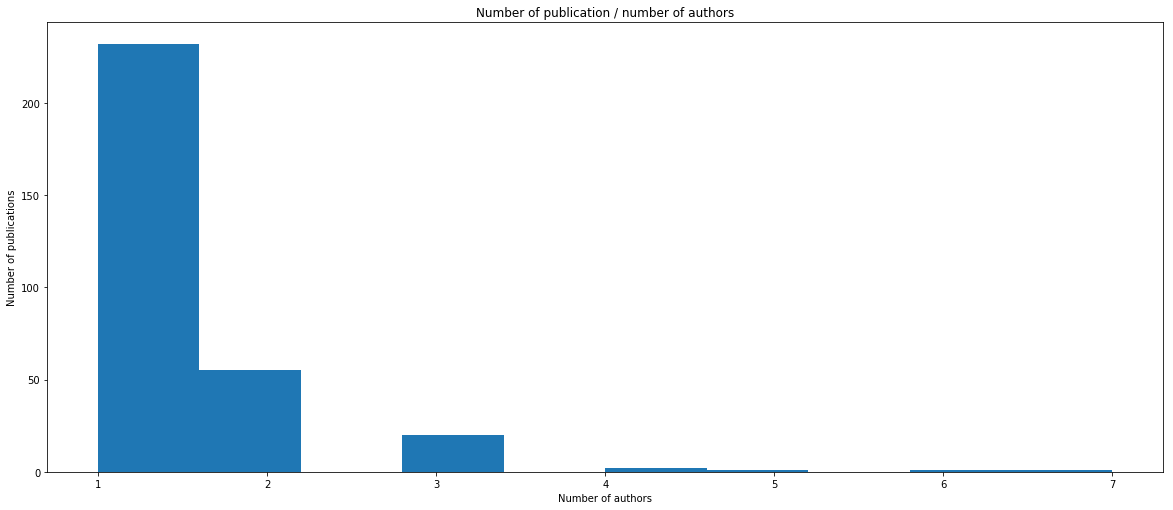

In [16]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8.27)
plt.xlabel('Number of authors')
plt.ylabel('Number of publications')
x = plt.title('Number of publication / number of authors')
x = plt.hist(df_data.groupby(by = 'author').count()['uri'])

In [17]:
y = df_data.groupby(by = 'author').count()['uri']

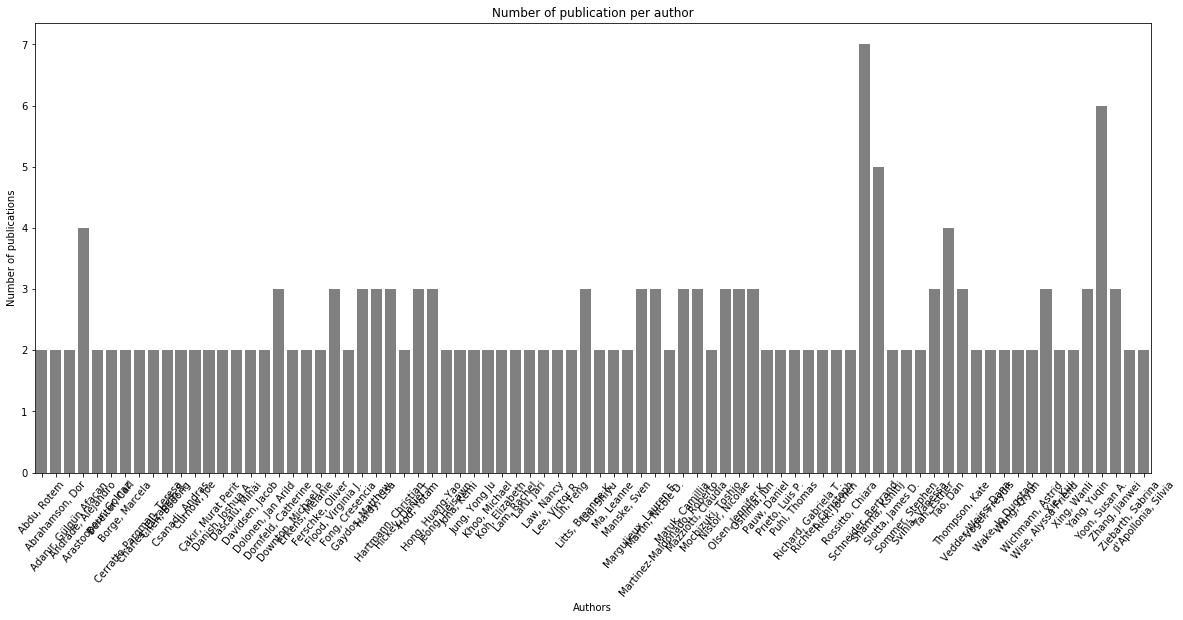

In [18]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8.27)
x = sns.barplot(y[y>1].index,y[y>1],color = 'grey')
plt.xticks(rotation=50)
plt.xlabel('Authors')
plt.ylabel('Number of publications')
x = plt.title('Number of publication per author')

# Getting all authors in to one dataframe:

In [19]:
df_data.columns

Index([        'iso',     'author8',        'type',    'author14',
           'author4',    'author18',      'author',    'abstract',
             'title',     'author3',    'author15',    'author22',
          'citation',     'subject',    'author10',     'author1',
          'author17',     'author7',         'uri',    'author13',
           'author9',      'issued',    'author19',     'author6',
          'author12',    'author20',    'author16',     'author5',
       'accessioned',    'author23',     'author2',    'author11',
         'available',          None,   'publisher',    'author21'],
      dtype='object')

In [20]:
cleaning = df_data.reset_index().melt(id_vars=['index','subject', 'iso', 'uri','type','publisher','title', 'issued', 'accessioned', 'citation', 'available', 'abstract'])

cleaning.dropna(inplace=True)
cleaning = cleaning[cleaning.value.map(lambda x: len(x) > 2)]

cleaning['author_name_length'] = cleaning.value.map(lambda x: len(x))

In [21]:
cleaning[cleaning.author_name_length < 5]

,index,subject,iso,uri,type,publisher,title,issued,accessioned,citation,available,abstract,variable,value,author_name_length


In [22]:
import re
cleaning['author_order'] =cleaning.variable.map(lambda x: 0 if len(re.search('\d*$', x).group(0)) == 0 else int(re.search('\d*$', x).group(0)))

In [23]:
del cleaning['variable']

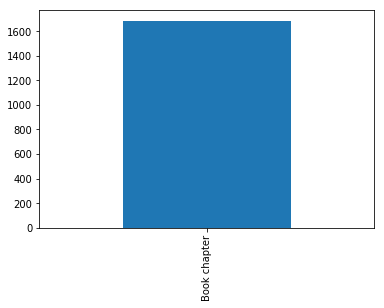

In [24]:
cleaning.value.value_counts().head().plot(kind='bar')

cleaning.publisher.value_counts().head().plot(kind='bar')

cleaning.type.value_counts().head().plot(kind='bar')

In [25]:
cleaning['index'].value_counts()

import2017/113          24
import2016short/167     20
import2017/115          19
import2017/114          18
import2017/117          18
import2015short/1110    18
import2016short/175     15
import2015short/1107    15
import2015short/1103    14
import2016short/176     13
import2015short/1101    12
import2016short/164     12
import2016short/173     12
import2015short/1116    12
import2016short/170     11
import2015short/1118    11
import2016short/150     10
import2016short/136     10
import2017/116          10
import2016short/165     10
import2017/118          10
import2016short/177     10
import2015full/165      10
import2015short/165     10
import2017/94           10
import2017/43           10
import2016full/59        9
import2016short/171      9
import2015full/176       9
import2015short/176      9
                        ..
import2016short/153      1
import2015short/137      1
import2016full/75        1
import2016full/23        1
import2016short/152      1
import2015full/154       1
i

In [26]:
cleaning.head()

,index,subject,iso,uri,type,publisher,title,issued,accessioned,citation,available,abstract,value,author_name_length,author_order
2,import2016full/59,,en,info:doi/10.22318/icls2016.59,Book chapter,Singapore: International Society of the Learni...,Blending Play and Inquiry in Augmented Reality...,2016-07,2017-03-21 12:05:42+00:00,"DeLiema, D., Saleh, A., Lee, C., Enyedy, N., D...",2017-03-21 12:05:42+00:00,Researchers have increasingly demonstrated how...,"Mahoney, Charlie",16,8
124,import2015full/165,"[innovative design approach, teaching, science...",en,https://doi.dx.org/10.22318/cscl2015.165,Book chapter,International Society of the Learning Science...,Design Features for Computer-Supported Complex...,2015-07,2017-06-19 14:15:51+00:00,"Yoon, S. A., Anderson, E., Koehler-Yom, J., Kl...",2017-06-19 14:15:51+00:00,While research on teaching and learning about ...,"Oztok, Murat",12,8
146,import2015full/176,"[education, learning outcomes, science educati...",en,https://doi.dx.org/10.22318/cscl2015.176,Book chapter,International Society of the Learning Science...,Impacts on Student Understanding of Scientific...,2015-07,2017-06-19 14:15:51+00:00,"Yoon, S. A., Koehler-Yom, J., Anderson, E., Oz...",2017-06-19 14:15:51+00:00,This paper presents a curriculum intervention ...,"Scheintaub, Hal",15,8
155,import2016short/150,,en,https://doi.dx.org/10.22318/icls2016.150,Book chapter,Singapore: International Society of the Learni...,Situating Deep Multimodal Data on Game-Based S...,2016-07,2017-06-19 11:36:19+00:00,"Anderson, C. G., Binzak, J. V., Dalsen, J., Sa...",2017-06-19 11:36:19+00:00,As STEM embedded games become more prevalent i...,"Squire, Kurt",12,8
165,import2016short/167,,en,https://doi.dx.org/10.22318/icls2016.167,Book chapter,Singapore: International Society of the Learni...,Future Learning Spaces for Learning Communitie...,2016-07,2017-06-19 11:36:42+00:00,"Hod, Y., Charles, E. S., Acosta, A., Ben-Zvi, ...",2017-06-19 11:36:42+00:00,This symposium presents our efforts to reconce...,"Lenton, Kevin",13,8


# Now parse citation to get the shortened name (which can be matched to refrences)

In [27]:
import numpy as np
import regex #

In [28]:
get_names = r'([\w\-\&]*[\,] [\p{Lu}\.\ ]+[\&\,]?)'

cleaning.reset_index(drop=True, inplace=True)

cleaning['shortend_names'] = cleaning.citation.map(lambda x: re.match(r'[\S\s]*\(\d{4}\)', x, re.U)\
                                                   .group(0)).map(lambda x: [x.replace(',', '').replace('&', '').rstrip() for x in regex.findall(get_names, x)])

cleaning['shortend_names'] = cleaning.apply(lambda x: x['shortend_names'][x['author_order']], axis=1)

In [29]:
cleaning.rename(columns={'index': 'file'}, inplace=True)

In [30]:
cleaning.to_csv('data/Parsed_metadata.csv')

In [31]:
cleaning['merge_index'] = cleaning.apply(lambda x: x['file']+str(x['author_order']), axis=1)

# Merging with universities to associated email with name?
## not perfectly possible, but may not need perfect merge

In [32]:
universities = pd.read_csv('data/Universities.csv', index_col=0)

In [33]:
universities.head()

,name,domain,mail,authorindex,file,country
0,"University of California, Berkeley",berkeley.edu,dor@berkeley.edu,0,import2016full/61,United States
1,Utrecht University,uu.nl,s.shayan@uu.nl,1,import2016full/61,Netherlands
2,Utrecht University,uu.nl,A.Bakker4@uu.nl,2,import2016full/61,Netherlands
3,Utrecht University,uu.nl,M.F.vanderSchaaf@uu.nl,3,import2016full/61,Netherlands
4,"University of California, Los Angeles",ucla.edu,deliema@g.ucla.edu,0,import2016full/59,United States


In [34]:
universities['merge_index'] = universities.apply(lambda x: x['file']+str(x['authorindex']), axis=1)

In [35]:
pd.merge(universities, cleaning, on='merge_index')

,name,domain,mail,authorindex,file_x,country,merge_index,file_y,subject,iso,...,title,issued,accessioned,citation,available,abstract,value,author_name_length,author_order,shortend_names
0,"University of California, Berkeley",berkeley.edu,dor@berkeley.edu,0,import2016full/61,United States,import2016full/610,import2016full/61,,en,...,Exposing Piaget’s Scheme: Empirical Evidence f...,2016-07,2017-03-21 12:05:42+00:00,"Abrahamson, D., Shayan, S., Bakker, A., & van ...",2017-03-21 12:05:42+00:00,The combination of two methodological resource...,"Abrahamson, Dor",15,0,Abrahamson D.
1,Utrecht University,uu.nl,s.shayan@uu.nl,1,import2016full/61,Netherlands,import2016full/611,import2016full/61,,en,...,Exposing Piaget’s Scheme: Empirical Evidence f...,2016-07,2017-03-21 12:05:42+00:00,"Abrahamson, D., Shayan, S., Bakker, A., & van ...",2017-03-21 12:05:42+00:00,The combination of two methodological resource...,"Shayan, Shakila",15,1,Shayan S.
2,Utrecht University,uu.nl,A.Bakker4@uu.nl,2,import2016full/61,Netherlands,import2016full/612,import2016full/61,,en,...,Exposing Piaget’s Scheme: Empirical Evidence f...,2016-07,2017-03-21 12:05:42+00:00,"Abrahamson, D., Shayan, S., Bakker, A., & van ...",2017-03-21 12:05:42+00:00,The combination of two methodological resource...,"Bakker, Arthur",14,2,Bakker A.
3,Utrecht University,uu.nl,M.F.vanderSchaaf@uu.nl,3,import2016full/61,Netherlands,import2016full/613,import2016full/61,,en,...,Exposing Piaget’s Scheme: Empirical Evidence f...,2016-07,2017-03-21 12:05:42+00:00,"Abrahamson, D., Shayan, S., Bakker, A., & van ...",2017-03-21 12:05:42+00:00,The combination of two methodological resource...,"van der Schaaf, Marieke F.",26,3,Schaaf M. F.
4,"University of California, Los Angeles",ucla.edu,deliema@g.ucla.edu,0,import2016full/59,United States,import2016full/590,import2016full/59,,en,...,Blending Play and Inquiry in Augmented Reality...,2016-07,2017-03-21 12:05:42+00:00,"DeLiema, D., Saleh, A., Lee, C., Enyedy, N., D...",2017-03-21 12:05:42+00:00,Researchers have increasingly demonstrated how...,"DeLiema, David",14,0,DeLiema D.
5,gmail,gmail.com,christine.lee.ucla@gmail.com,1,import2016full/59,NaN,import2016full/591,import2016full/59,,en,...,Blending Play and Inquiry in Augmented Reality...,2016-07,2017-03-21 12:05:42+00:00,"DeLiema, D., Saleh, A., Lee, C., Enyedy, N., D...",2017-03-21 12:05:42+00:00,Researchers have increasingly demonstrated how...,"Saleh, Asmalina",15,1,Saleh A.
6,"University of California, Los Angeles",ucla.edu,enyedy@gseis.ucla.edu,2,import2016full/59,United States,import2016full/592,import2016full/59,,en,...,Blending Play and Inquiry in Augmented Reality...,2016-07,2017-03-21 12:05:42+00:00,"DeLiema, D., Saleh, A., Lee, C., Enyedy, N., D...",2017-03-21 12:05:42+00:00,Researchers have increasingly demonstrated how...,"Lee, Christine",14,2,Lee C.
7,"University of California, Los Angeles",ucla.edu,randy@remap.ucla.edu,3,import2016full/59,United States,import2016full/593,import2016full/59,,en,...,Blending Play and Inquiry in Augmented Reality...,2016-07,2017-03-21 12:05:42+00:00,"DeLiema, D., Saleh, A., Lee, C., Enyedy, N., D...",2017-03-21 12:05:42+00:00,Researchers have increasingly demonstrated how...,"Enyedy, Noel",12,3,Enyedy N.
8,gmail,gmail.com,maggiedahn@gmail.com,4,import2016full/59,NaN,import2016full/594,import2016full/59,,en,...,Blending Play and Inquiry in Augmented Reality...,2016-07,2017-03-21 12:05:42+00:00,"DeLiema, D., Saleh, A., Lee, C., Enyedy, N., D...",2017-03-21 12:05:42+00:00,Researchers have increasingly demonstrated how...,"Danish, Joshua",14,4,Danish J.
9,Indiana University at Bloomington,indiana.edu,asmsaleh@indiana.edu,5,import2016full/59,United States,import2016full/595,import2016full/59,,en,...,Blending Play and Inquiry in Augmented Reality...,2016-07,2017-03-21 12:05:42+00:00,"DeLiema, D., Saleh, A., Lee, C., Enyedy, N., D...",2017-03-21 12:05:42+00:00,Researchers have increasingly demonstrated how...,"Illum, Randy",12,5,Illum R.


In [36]:
cleaning

,file,subject,iso,uri,type,publisher,title,issued,accessioned,citation,available,abstract,value,author_name_length,author_order,shortend_names,merge_index
0,import2016full/59,,en,info:doi/10.22318/icls2016.59,Book chapter,Singapore: International Society of the Learni...,Blending Play and Inquiry in Augmented Reality...,2016-07,2017-03-21 12:05:42+00:00,"DeLiema, D., Saleh, A., Lee, C., Enyedy, N., D...",2017-03-21 12:05:42+00:00,Researchers have increasingly demonstrated how...,"Mahoney, Charlie",16,8,Mahoney C.,import2016full/598
1,import2015full/165,"[innovative design approach, teaching, science...",en,https://doi.dx.org/10.22318/cscl2015.165,Book chapter,International Society of the Learning Science...,Design Features for Computer-Supported Complex...,2015-07,2017-06-19 14:15:51+00:00,"Yoon, S. A., Anderson, E., Koehler-Yom, J., Kl...",2017-06-19 14:15:51+00:00,While research on teaching and learning about ...,"Oztok, Murat",12,8,Oztok M.,import2015full/1658
2,import2015full/176,"[education, learning outcomes, science educati...",en,https://doi.dx.org/10.22318/cscl2015.176,Book chapter,International Society of the Learning Science...,Impacts on Student Understanding of Scientific...,2015-07,2017-06-19 14:15:51+00:00,"Yoon, S. A., Koehler-Yom, J., Anderson, E., Oz...",2017-06-19 14:15:51+00:00,This paper presents a curriculum intervention ...,"Scheintaub, Hal",15,8,Scheintaub H.,import2015full/1768
3,import2016short/150,,en,https://doi.dx.org/10.22318/icls2016.150,Book chapter,Singapore: International Society of the Learni...,Situating Deep Multimodal Data on Game-Based S...,2016-07,2017-06-19 11:36:19+00:00,"Anderson, C. G., Binzak, J. V., Dalsen, J., Sa...",2017-06-19 11:36:19+00:00,As STEM embedded games become more prevalent i...,"Squire, Kurt",12,8,Squire K.,import2016short/1508
4,import2016short/167,,en,https://doi.dx.org/10.22318/icls2016.167,Book chapter,Singapore: International Society of the Learni...,Future Learning Spaces for Learning Communitie...,2016-07,2017-06-19 11:36:42+00:00,"Hod, Y., Charles, E. S., Acosta, A., Ben-Zvi, ...",2017-06-19 11:36:42+00:00,This symposium presents our efforts to reconce...,"Lenton, Kevin",13,8,Lenton K.,import2016short/1678
5,import2016short/173,,en,https://doi.dx.org/10.22318/icls2016.173,Book chapter,Singapore: International Society of the Learni...,Fostering Deliberative Discourse in Schools To...,2016-07,2017-06-19 11:36:51+00:00,"Schwarz, B., Rajala, A., Rosé, C. P., Clarke, ...",2017-06-19 11:36:51+00:00,This symposium focuses on forms of classroom d...,"Mäkitalo, Åsa",13,8,Mäkitalo Å.,import2016short/1738
6,import2016short/175,,en,https://doi.dx.org/10.22318/icls2016.175,Book chapter,Singapore: International Society of the Learni...,Real-Time Visualization of Student Activities ...,2016-07,2017-06-19 11:36:54+00:00,"Tissenbaum, M., Matuk, C., Berland, M., Lyons,...",2017-06-19 11:36:54+00:00,Data logged within technology-based learning e...,"Olsen, Al",9,8,Olsen A.,import2016short/1758
7,import2016short/165,,en,https://doi.dx.org/10.22318/icls2016.165,Book chapter,Singapore: International Society of the Learni...,Agentive Learning for Sustainability and Equit...,2016-07,2017-06-19 11:36:38+00:00,"Engeström, Y., Sannino, A., Bal, A., Lotz-Sisi...",2017-06-19 11:36:38+00:00,This symposium expands the object and scope of...,"Querol, Marco Pereira",21,8,Querol M. P.,import2016short/1658
8,import2016short/136,,en,https://doi.dx.org/10.22318/icls2016.136,Book chapter,Singapore: International Society of the Learni...,Is Small Group Collaboration Beneficial in Lar...,2016-07,2017-06-19 11:36:01+00:00,"Kyewski, E., Krämer, N. C., Christmann, N., El...",2017-06-19 11:36:01+00:00,The paper analyzes students’ experience within...,"Rummel, Nikol",13,8,Rummel N.,import2016short/1368
9,import2016short/164,,en,https://doi.dx.org/10.22318/icls2016.164,Book chapter,Singapore: International Society of the Learni...,Connected Making: Designing for Youth Learning...,2016-07,2017-06-19 11:36

In [37]:
cleaning[cleaning.file == 'import2016short/145']

,file,subject,iso,uri,type,publisher,title,issued,accessioned,citation,available,abstract,value,author_name_length,author_order,shortend_names,merge_index
319,import2016short/145,,en,https://doi.dx.org/10.22318/icls2016.145,Book chapter,Singapore: International Society of the Learni...,Iterative Curricular Design of Collaborative I...,2016-07,2017-06-19 11:36:13+00:00,"Sommer, S., Graville-Smith, C., Hinojosa, L., ...",2017-06-19 11:36:13+00:00,This short report describes the design and imp...,"Sommer, Stephen",15,0,Sommer S.,import2016short/1450
633,import2016short/145,,en,https://doi.dx.org/10.22318/icls2016.145,Book chapter,Singapore: International Society of the Learni...,Iterative Curricular Design of Collaborative I...,2016-07,2017-06-19 11:36:13+00:00,"Sommer, S., Graville-Smith, C., Hinojosa, L., ...",2017-06-19 11:36:13+00:00,This short report describes the design and imp...,"Polman, Joseph",14,3,Polman J.,import2016short/1453
921,import2016short/145,,en,https://doi.dx.org/10.22318/icls2016.145,Book chapter,Singapore: International Society of the Learni...,Iterative Curricular Design of Collaborative I...,2016-07,2017-06-19 11:36:13+00:00,"Sommer, S., Graville-Smith, C., Hinojosa, L., ...",2017-06-19 11:36:13+00:00,This short report describes the design and imp...,"Graville-Smith, Cynthia",23,1,Graville-Smith C.,import2016short/1451
1492,import2016short/145,,en,https://doi.dx.org/10.22318/icls2016.145,Book chapter,Singapore: International Society of the Learni...,Iterative Curricular Design of Collaborative I...,2016-07,2017-06-19 11:36:13+00:00,"Sommer, S., Graville-Smith, C., Hinojosa, L., ...",2017-06-19 11:36:13+00:00,This short report describes the design and imp...,"Hinojosa, Leighanna",19,2,Hinojosa L.,import2016short/1452


In [38]:
universities[universities.file == 'import2016short/145']

,name,domain,mail,authorindex,file,country,merge_index
567,University of Colorado at Boulder,colorado.edu,Stephen.Sommer@Colorado.edu,0,import2016short/145,United States,import2016short/1450
568,Saint Louis University,slu.edu,cgravill@slu.edu,1,import2016short/145,United States,import2016short/1451
569,University of Colorado at Boulder,colorado.edu,Joseph.Polman@Colorado.edu,2,import2016short/145,United States,import2016short/1452
570,University of Colorado at Boulder,colorado.edu,Leighanna.Hinojosa@Colorado.edu,3,import2016short/145,United States,import2016short/1453
571,gmail,gmail.com,jakita.owensby@gmail.com,4,import2016short/145,NaN,import2016short/1454
572,gmail,gmail.com,rachellecelisse@gmail.com,5,import2016short/145,NaN,import2016short/1455
573,spelman,scmail.spelman.edu,oodemwi1@scmail.spelman.edu,6,import2016short/145,NaN,import2016short/1456


Can't do that because order isn't same :( 

In [39]:
mega_frame = pd.merge(universities, cleaning, on='merge_index')

In [40]:
mega_frame[mega_frame.file_x == 'import2016short/145']

,name,domain,mail,authorindex,file_x,country,merge_index,file_y,subject,iso,...,title,issued,accessioned,citation,available,abstract,value,author_name_length,author_order,shortend_names
563,University of Colorado at Boulder,colorado.edu,Stephen.Sommer@Colorado.edu,0,import2016short/145,United States,import2016short/1450,import2016short/145,,en,...,Iterative Curricular Design of Collaborative I...,2016-07,2017-06-19 11:36:13+00:00,"Sommer, S., Graville-Smith, C., Hinojosa, L., ...",2017-06-19 11:36:13+00:00,This short report describes the design and imp...,"Sommer, Stephen",15,0,Sommer S.
564,Saint Louis University,slu.edu,cgravill@slu.edu,1,import2016short/145,United States,import2016short/1451,import2016short/145,,en,...,Iterative Curricular Design of Collaborative I...,2016-07,2017-06-19 11:36:13+00:00,"Sommer, S., Graville-Smith, C., Hinojosa, L., ...",2017-06-19 11:36:13+00:00,This short report describes the design and imp...,"Graville-Smith, Cynthia",23,1,Graville-Smith C.
565,University of Colorado at Boulder,colorado.edu,Joseph.Polman@Colorado.edu,2,import2016short/145,United States,import2016short/1452,import2016short/145,,en,...,Iterative Curricular Design of Collaborative I...,2016-07,2017-06-19 11:36:13+00:00,"Sommer, S., Graville-Smith, C., Hinojosa, L., ...",2017-06-19 11:36:13+00:00,This short report describes the design and imp...,"Hinojosa, Leighanna",19,2,Hinojosa L.
566,University of Colorado at Boulder,colorado.edu,Leighanna.Hinojosa@Colorado.edu,3,import2016short/145,United States,import2016short/1453,import2016short/145,,en,...,Iterative Curricular Design of Collaborative I...,2016-07,2017-06-19 11:36:13+00:00,"Sommer, S., Graville-Smith, C., Hinojosa, L., ...",2017-06-19 11:36:13+00:00,This short report describes the design and imp...,"Polman, Joseph",14,3,Polman J.


# Building the co-citation graph:

In [62]:
references = pd.read_csv('data/References.csv', index_col=0)

In [63]:
references.shape

(8649, 4)

In [64]:
references.columns

Index(['ref', 'file', 'ref_parsed', 'year'], dtype='object')

In [65]:
relevant_cols = ['ref', 'file', 'ref_parsed']

In [66]:
co_citation = pd.merge(references[relevant_cols],references[relevant_cols], on='ref', how='outer')

In [67]:
#remove self loops
co_citation = co_citation[co_citation.file_x != co_citation.file_y]

In [68]:
co_citation

,ref,file_x,ref_parsed_x,file_y,ref_parsed_y
3,"Abrahamson, D., Lee, R. G., Negrete, A. G., & ...",import2016full/61,"Abrahamson, D., Lee, R. G., Negrete, A. G., & ...",import2016full/42,"Abrahamson, D., Lee, R. G., Negrete, A. G., & ..."
4,"Abrahamson, D., Lee, R. G., Negrete, A. G., & ...",import2016full/42,"Abrahamson, D., Lee, R. G., Negrete, A. G., & ...",import2016full/61,"Abrahamson, D., Lee, R. G., Negrete, A. G., & ..."
8,"Abrahamson, D., Shayan, S., Bakker, A., & Van ...",import2016full/61,"Abrahamson, D., Shayan, S., Bakker, A., & Van ...",import2016full/42,"Abrahamson, D., Shayan, S., Bakker, A., & Van ..."
9,"Abrahamson, D., Shayan, S., Bakker, A., & Van ...",import2016full/42,"Abrahamson, D., Shayan, S., Bakker, A., & Van ...",import2016full/61,"Abrahamson, D., Shayan, S., Bakker, A., & Van ..."
17,"Chemero, A. (2009). Radical embodied cognitive...",import2016full/61,"Chemero, A. (2009)",import2016full/42,"Chemero, A. (2009)"
18,"Chemero, A. (2009). Radical embodied cognitive...",import2016full/42,"Chemero, A. (2009)",import2016full/61,"Chemero, A. (2009)"
42,"Piaget, J. (1968). Genetic epistemology (E. Du...",import2016full/61,"Piaget, J. (1968)",import2016full/42,"Piaget, J. (1968)"
43,"Piaget, J. (1968). Genetic epistemology (E. Du...",import2016full/42,"Piaget, J. (1968)",import2016full/61,"Piaget, J. (1968)"
55,"Thelen, E., & Smith, L. B. (1994). A dynamic s...",import2016full/61,"Thelen, E., & Smith, L. B. (1994)",import2016full/42,"Thelen, E., & Smith, L. B. (1994)"
56,"Thelen, E., & Smith, L. B. (1994). A dynamic s...",import2016full/42,"Thelen, E., & Smith, L. B. (1994)",import2016full/61,"Thelen, E., & Smith, L. B. (1994)"


In [69]:
nodes = pd.DataFrame(co_citation.file_x.drop_duplicates().reset_index(drop=True)).reset_index()
nodes.head()

,index,file_x
0,0,import2016full/61
1,1,import2016full/42
2,2,import2016full/59
3,3,import2015short/287
4,4,import2016short/151


In [70]:
edges = pd.merge(nodes, co_citation, on='file_x')

#edges = pd.merge(nodes, co_citation, left_on='file_x', right_on='file_y')#[['index_x', 'index_y']]

edges.head()

,index,file_x,ref,ref_parsed_x,file_y,ref_parsed_y
0,0,import2016full/61,"Abrahamson, D., Lee, R. G., Negrete, A. G., & ...","Abrahamson, D., Lee, R. G., Negrete, A. G., & ...",import2016full/42,"Abrahamson, D., Lee, R. G., Negrete, A. G., & ..."
1,0,import2016full/61,"Abrahamson, D., Shayan, S., Bakker, A., & Van ...","Abrahamson, D., Shayan, S., Bakker, A., & Van ...",import2016full/42,"Abrahamson, D., Shayan, S., Bakker, A., & Van ..."
2,0,import2016full/61,"Chemero, A. (2009). Radical embodied cognitive...","Chemero, A. (2009)",import2016full/42,"Chemero, A. (2009)"
3,0,import2016full/61,"Piaget, J. (1968). Genetic epistemology (E. Du...","Piaget, J. (1968)",import2016full/42,"Piaget, J. (1968)"
4,0,import2016full/61,"Thelen, E., & Smith, L. B. (1994). A dynamic s...","Thelen, E., & Smith, L. B. (1994)",import2016full/42,"Thelen, E., & Smith, L. B. (1994)"


way to identify reference uniquely without needing entire string...

In [71]:
pd.merge(references,references, on='ref_parsed', how='outer').shape

(21351, 7)

In [72]:
n_nodes = len(nodes)
adjacency = np.zeros((n_nodes, n_nodes), dtype=int)

for idx, row in edges.iterrows():
    i, j = int(row.index_x), int(row.index_y)
    adjacency[j, i] = 1
    adjacency[i, j] = 1

AttributeError: 'Series' object has no attribute 'index_x'

In [ ]:
adjacency.shape

In [ ]:
graph = nx.from_numpy_array(adjacency)
nx.write_gexf(graph, 'data/co_citation_graph.gexf')